# <span style="color:#820747">2. Exploratory Data Analysis for project with a web scrapind and price prediction.
                                                                                             by Pavel Tarasenko

# <span style="color:#6e750e">Navigator:

<b>[1. WebScraping](./1_WebScraping-and-Cleaning-Data.ipynb)

<b>[3. Salary Prediction](./3_MODELING_Part1.ipynb)

<b>[4. Factors that distinguish job category](./4_Factors that distinguish job category.ipynb)

<b>[5. TECHNICAL REPORT](./Technical_report.txt)

<b>[6. NON TECHNICAL REPORT](./Non_technical_report.txt)

In [1]:
# DESCRIPTION

# 4438 lines
# 8 columns
# 277 kb. 
# types for the each column is object but salary

# location ---- city name to where advertisement related to
# title ------- job title 
# company ----- company to who this advertisement related to
# salary ------ avarage salary per year
# Salary_type - salary time to which salary was related before formating
# summary ----- shot summary to related job title
# job_bio ----- big samary could includ many things related to duties etc. 
# level ------- level of the job position (junior, senior, middle)

<span style="color:red">
--- comment ---

<span style="color:#1d5dec"> In this part I will do some EDA and plot few graphs to make data more understandable visual.

In [2]:
# Import all necessary libraries.
# -----------------------------------------------------
import matplotlib.pyplot as plt
import pandas as pd
import bs4
import re
import time
import numpy as np
import sklearn
from time import sleep
import requests
import seaborn as sns
import matplotlib as mpl
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# Load my data for analys and place it into DataFrame (df)
# -----------------------------------------------------
df = pd.read_csv('3_FOR_NLP.csv')

In [4]:
# From describe I can see that I should have few outliers in max salary, we have 75% of our salary about $130000,
# I will show it in box plot later. 
# -----------------------------------------------------
df.describe()

,salary
count,868.000000
mean,113008.348733
std,42756.091126
min,18200.000000
25%,85000.000000
50%,110000.000000
75%,130000.000000
max,286000.000000


In [5]:
# Due to I got most of fitures not numerical, we will use NLP to get features, from job summaries and other 
# columns which I can use to predict the salary. 
# -----------------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4438 entries, 0 to 4437
Data columns (total 8 columns):
location       4438 non-null object
title          4438 non-null object
company        4438 non-null object
salary         868 non-null float64
Salary_type    868 non-null object
summary        4438 non-null object
job_bio        4438 non-null object
level          4438 non-null object
dtypes: float64(1), object(7)
memory usage: 277.5+ KB


In [6]:
# To plot my existing salaries I drop all values without salary. I have only 868 jobs with given salary.
# -----------------------------------------------------
df.dropna(axis=0, inplace=True)
df.shape

(868, 8)

In [7]:
df.head(7)

,location,title,company,salary,Salary_type,summary,job_bio,level
0,sydney,data science research engineer,macquarie university,106382.0,year,we are seeking a data science research enginee...,macquarie is the university of pioneering mind...,middle
1,sydney,senior software engineer machine learning,rokt,137500.0,year,a strong statistical background and or experie...,exceptional opportunity to join one of the fas...,senior
2,sydney,event research analyst,destination nsw corporate services,93704.5,year,outline your experience in carrying out market...,event research analyst 0000650n ongoing fu...,middle
3,sydney,junior data scientist,correlate resources,75000.0,year,as a junior data scientist the responsibilitie...,our client is an industry pioneering customer ...,junior
4,sydney,scientist,science division,108792.0,year,data layers satellite imagery photography o...,scientist 00006173 job title scientist job...,middle
5,sydney,data scientist engineering,onset group pty ltd,145000.0,year,big data technologies this is a significant ...,the core product integrates with external clie...,middle
6,sydney,data scientist python r,correlate resources,110000.0,year,work within a team of industry leading data sc...,our client is an industry pioneering customer ...,middle


<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
On this graph I can see mean of salaries across 5 cities I choose. Accoding to this graph salary in Brisbane seems to be higher than anywhere else in Australia. And Perth has lower salary mean across this 5 cities. 

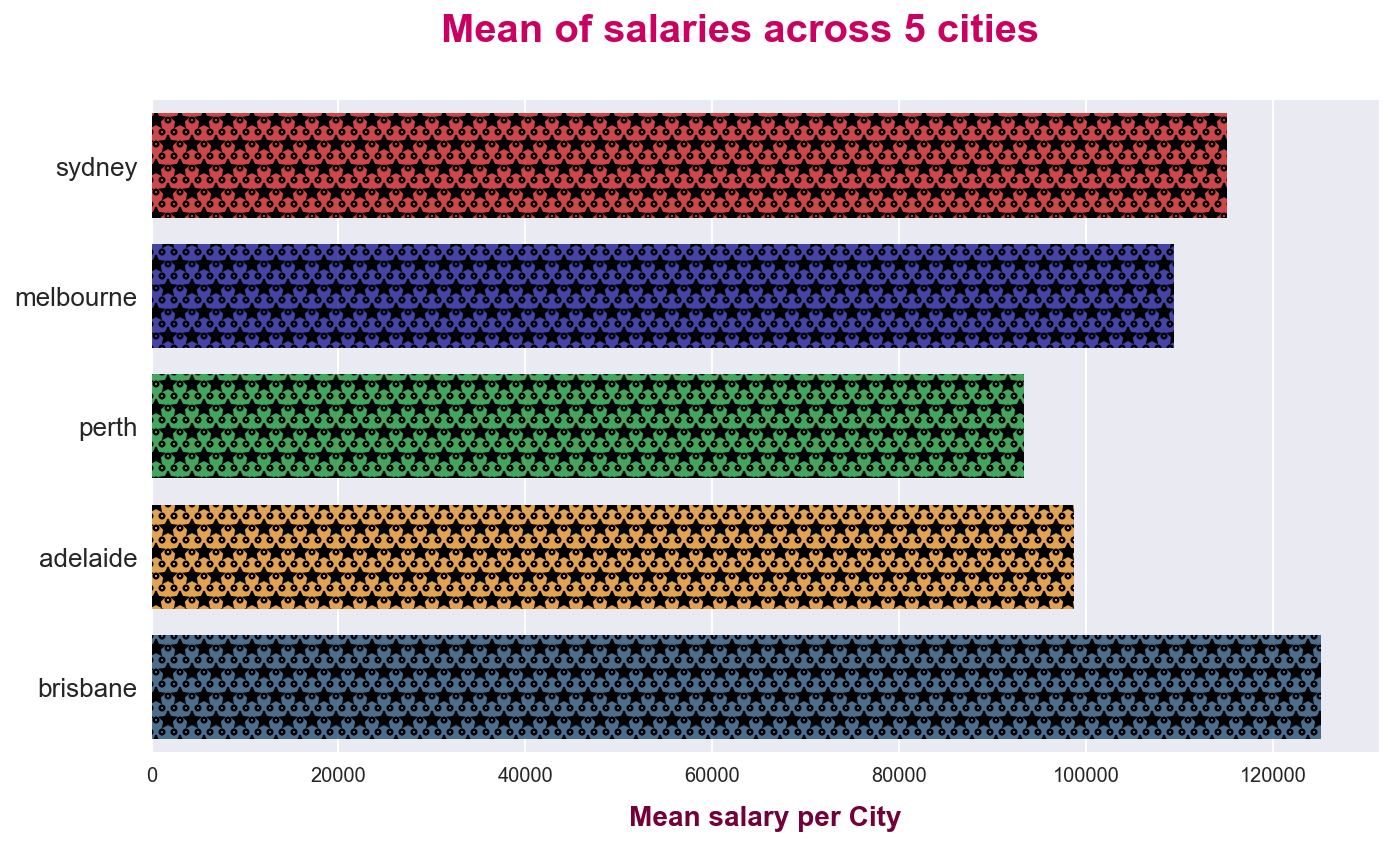

In [8]:
fig = plt.figure(1, figsize = (11, 6))
colors_city = ['#e50000', '#0504aa', '#02ab2e', '#ff9408', '#155084'] # set list of colors I will use
ax = sns.barplot(x = "salary", y = "location", data = df, palette = colors_city, hatch = 'oo*', 
                 alpha = 0.8,  ci = None)

ax.yaxis.label.set_visible(False)
plt.suptitle('Mean of salaries across 5 cities ', fontsize=20, color='#cb0162',  weight = 'bold')
plt.yticks(fontsize=13)
plt.xlabel('Mean salary per City', fontsize=14, weight = 'bold', labelpad=10, color='#730039')

plt.show()

<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
On next graph I can see obvious difference in salary between levels of position. We can see that junior position twice less in salary which is logicaly right.  

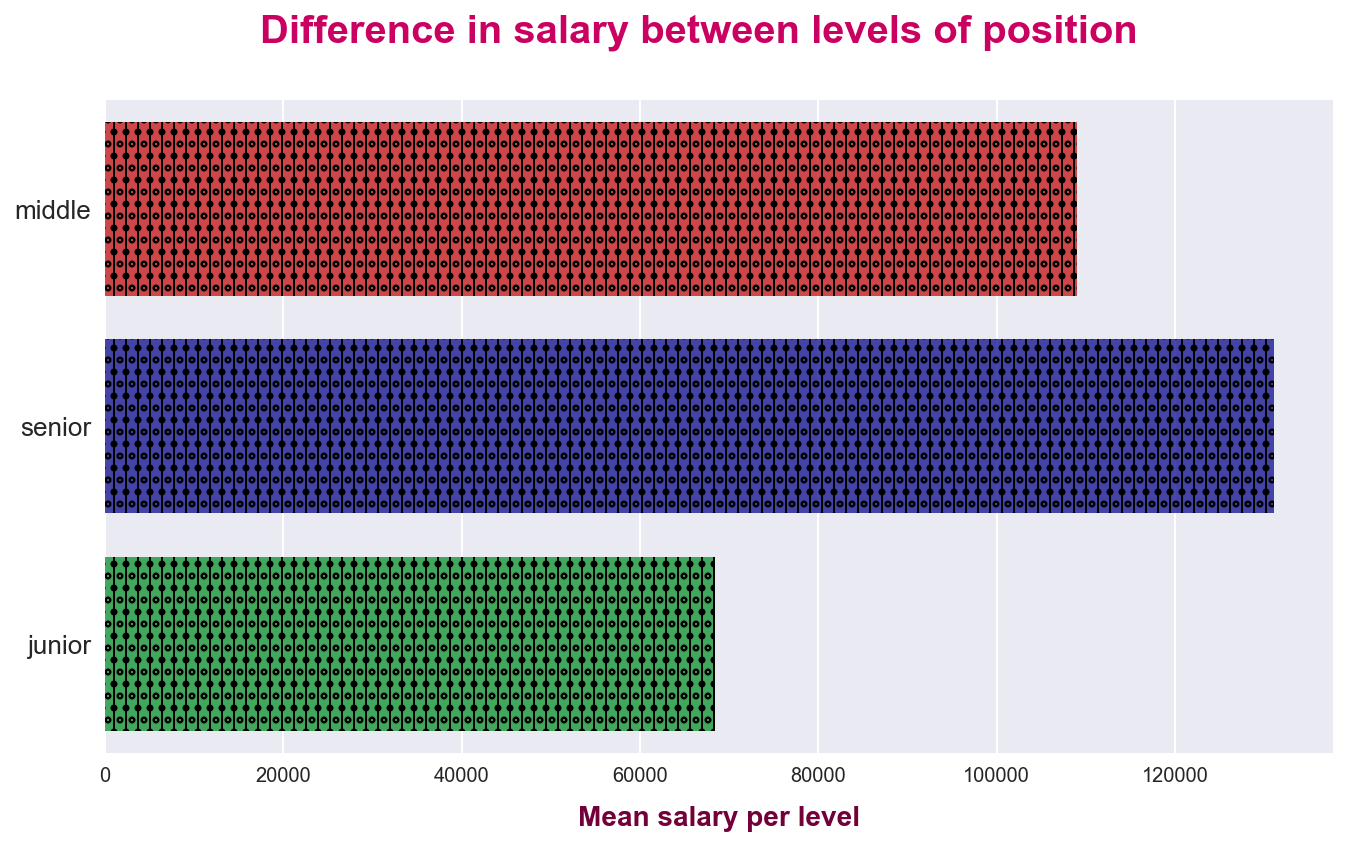

In [9]:
fig = plt.figure(1, figsize = (11, 6))
colors_city = ['#e50000', '#0504aa', '#02ab2e']
ax = sns.barplot(x = "salary", y = "level", data = df, palette = colors_city , hatch = '||oo', alpha = 0.8, ci = None)

ax.yaxis.label.set_visible(False)
plt.suptitle('Difference in salary between levels of position', fontsize=20, color='#cb0162',  weight = 'bold')
plt.yticks(fontsize=13)
plt.xlabel('Mean salary per level', fontsize=14, weight = 'bold', labelpad=10, color='#730039')
plt.show()

<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
On this graph I can see that position where payment was mentioned per day, or per hour tends to be much higher than annual, that is because all those position normally contract jobs, and normally salary is higher on that kind of positions. Also I got one anomaly, weekly payment is very low even with a senior positions, this is not my mistake, that data exists on website. In this case I will not do any changes in this case and keep it as it is. 

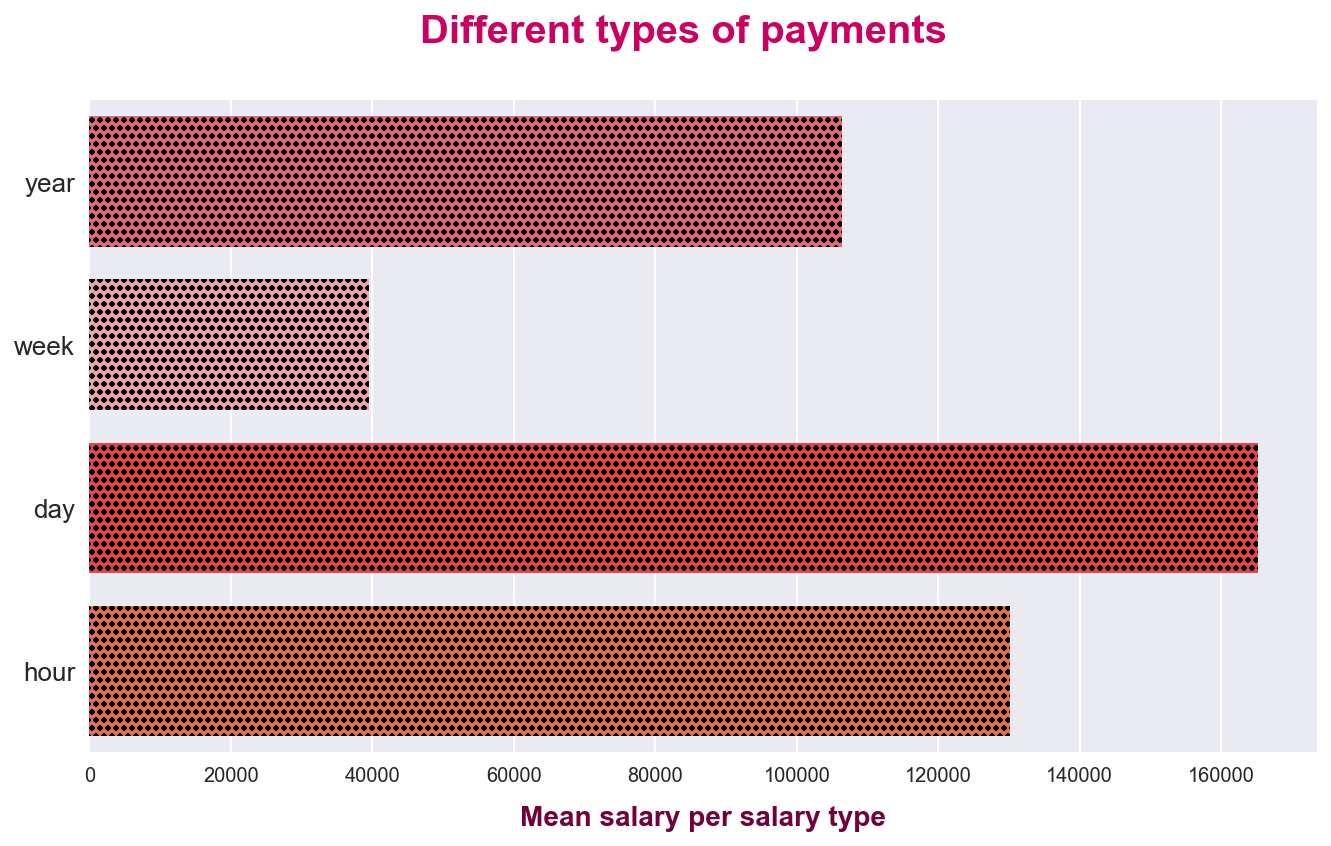

In [10]:
fig = plt.figure(1, figsize = (11, 6))
colors_city = ['#fe2f4a', '#fe828c', '#fe0002', '#fe420f']
ax = sns.barplot(x = "salary", y = "Salary_type", data = df, palette = colors_city, hatch = 'ooo', 
                 alpha = 0.8, ci = None)


ax.yaxis.label.set_visible(False)
plt.suptitle('Different types of payments', fontsize=20, color='#cb0162',  weight = 'bold')
plt.yticks(fontsize=13)
plt.xlabel('Mean salary per salary type',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

plt.show()

In [11]:
# Check median salary group by cities. 
# -----------------------------------------------------
df.groupby('location').median()

,salary
location,
adelaide,88400.00
brisbane,110000.00
melbourne,103359.75
perth,88500.00
sydney,114400.00


In [12]:
# Check mean salary group by cities.
# -----------------------------------------------------
df.groupby('location').mean()

,salary
location,
adelaide,98680.033333
brisbane,125079.514607
melbourne,109365.643377
perth,93333.075758
sydney,115082.875524


<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
From salary median and mean we can see there is no big difference, scewness. And I plot histogram to show visualy our mean and median. 

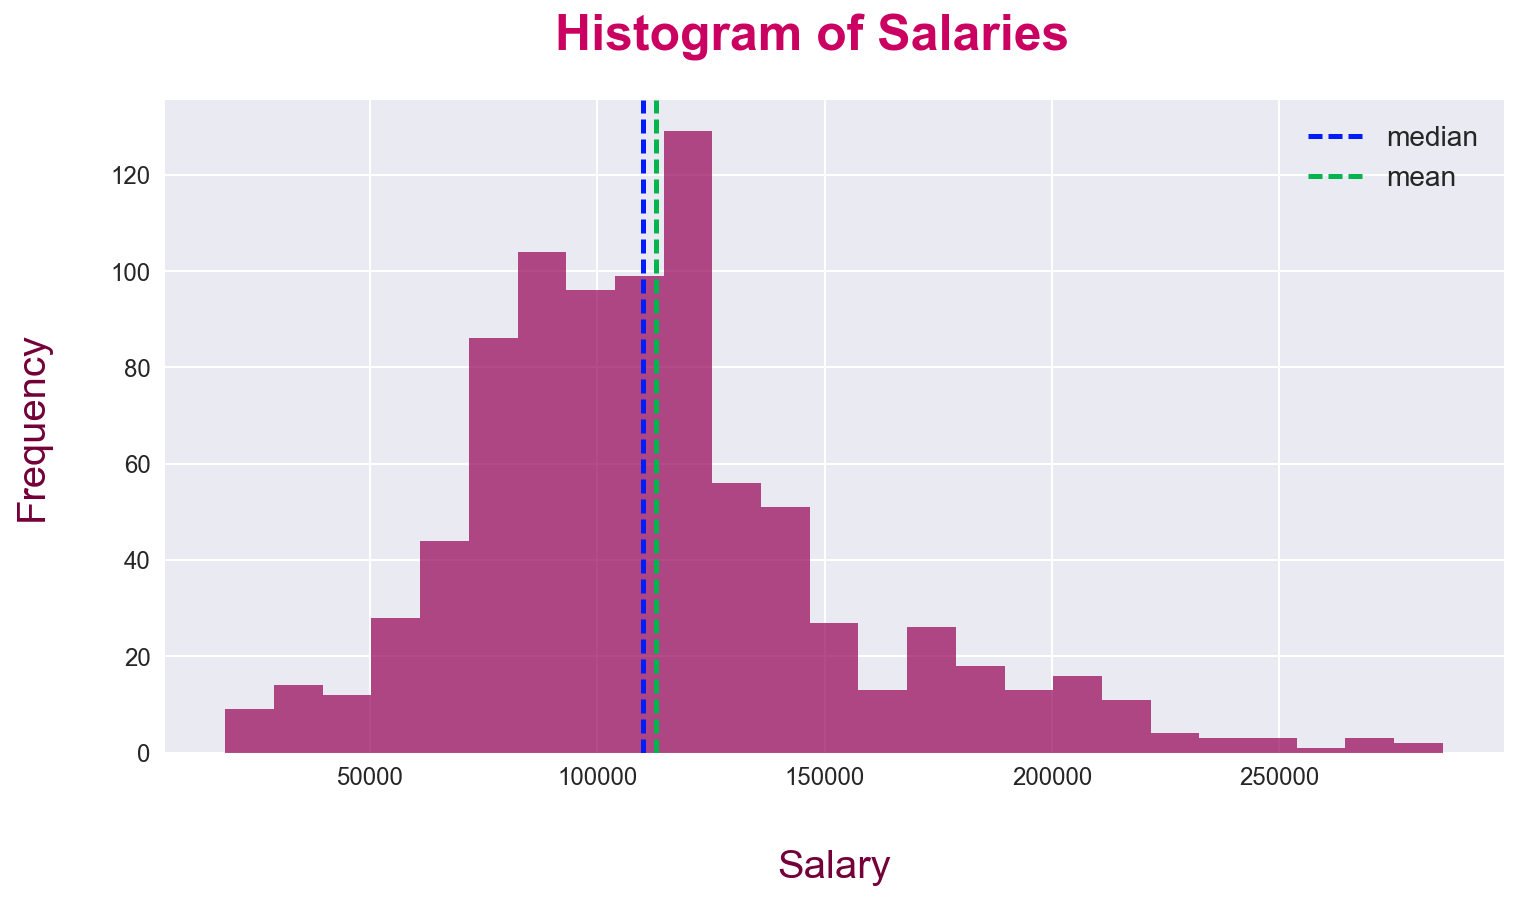

In [13]:
fig = plt.figure(figsize=(12,6))
ax = sns.distplot(df.salary, bins=25, kde=False, hist_kws={'color': '#960056', 'alpha': 0.7})

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Frequency', fontsize=20,  labelpad=30, color='#730039')
plt.xlabel('Salary', fontsize=20, labelpad=30, color='#730039')
plt.suptitle('Histogram of Salaries', fontsize=25, color='#cb0162',  weight = 'bold')  
    
plt.axvline(df.salary.median(), lw=2.5, ls='dashed', color='#021bf9', label='median')
plt.axvline(df.salary.mean(), lw=2.5, ls='dashed', color='#01b44c', label='mean')

plt.legend(loc=1, prop={'size': 14})

plt.show()

In [14]:
# Salary median is $110000 
print('My salary Median is: {}'.format(df.salary.median()))

My salary Median is: 110000.0


<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
Salary has few outliers which is starts around salary equals $200000 Also I can see that my distribution is kind of normally distributed. I will box plot my outliers.

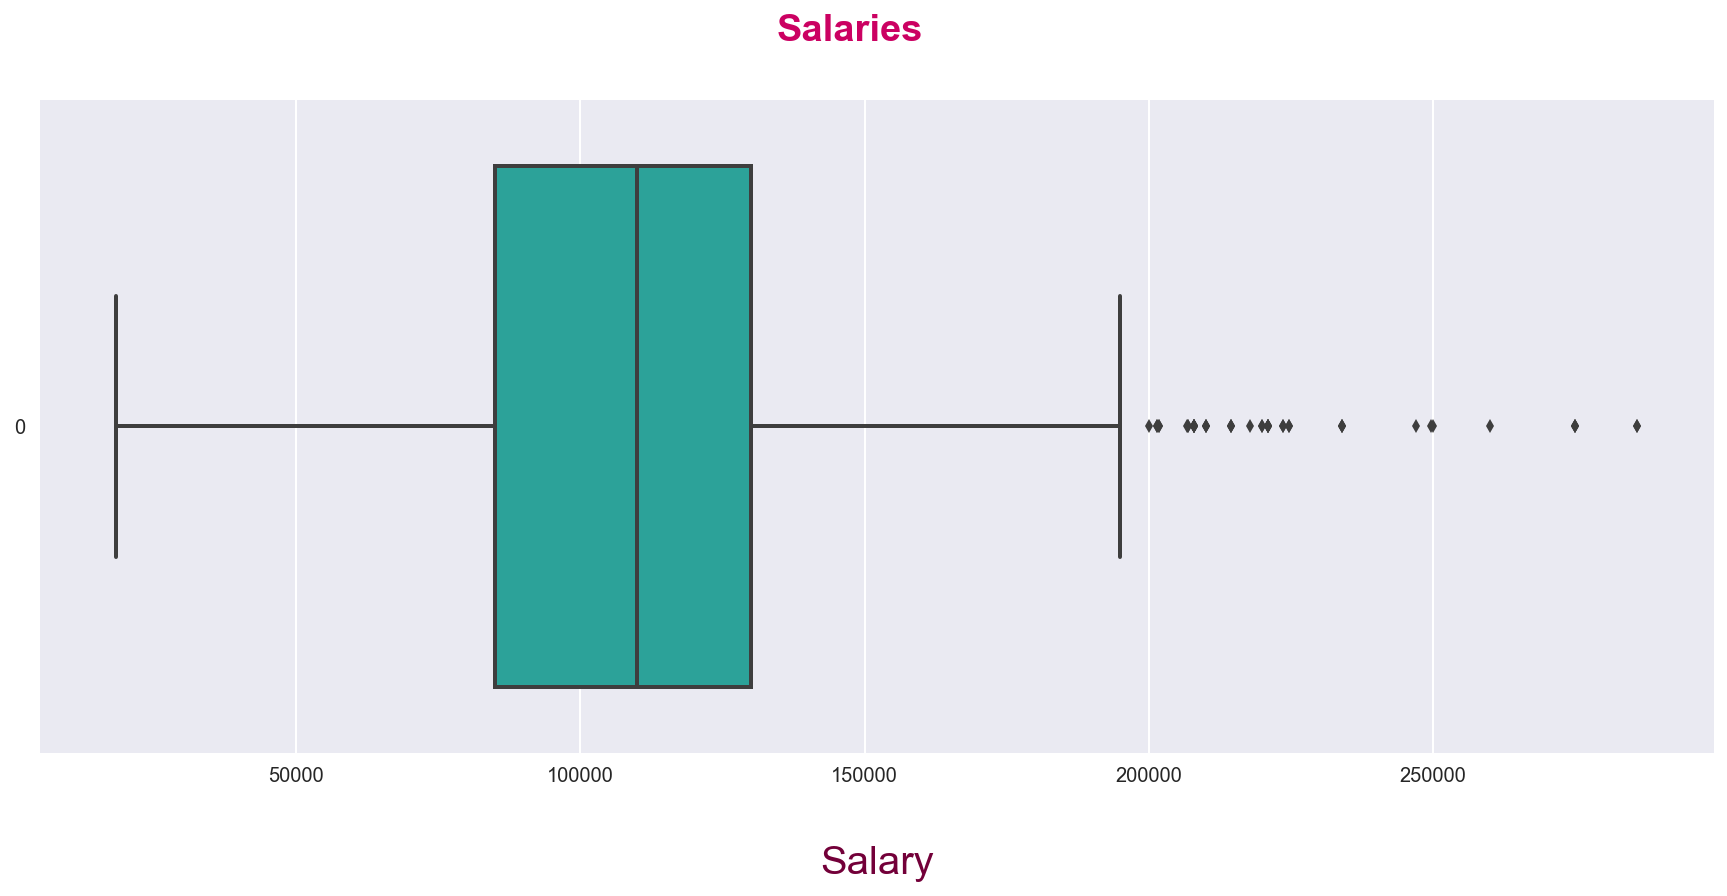

In [15]:
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(15,6))
ax = sns.boxplot(data=df.salary, orient='h', fliersize=5, 
                 linewidth=2, notch=False, saturation=0.7, color='#13bbaf')
plt.suptitle('Salaries', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Salary', fontsize=20, labelpad=30, color='#730039')
plt.show()

In [16]:
# Group location by title and count how many jobs for each city avalable with a given salary. 
# -----------------------------------------------------
new = pd.DataFrame({'count' : df.groupby('location')['title'].count()}).reset_index()

In [17]:
new

,location,count
0,adelaide,15
1,brisbane,89
2,melbourne,302
3,perth,33
4,sydney,429


<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
On this graph I can see that nly Sydney and Melbourne has big number of jobs given with salary. Adelaide has very low number which is 15 jobs. 

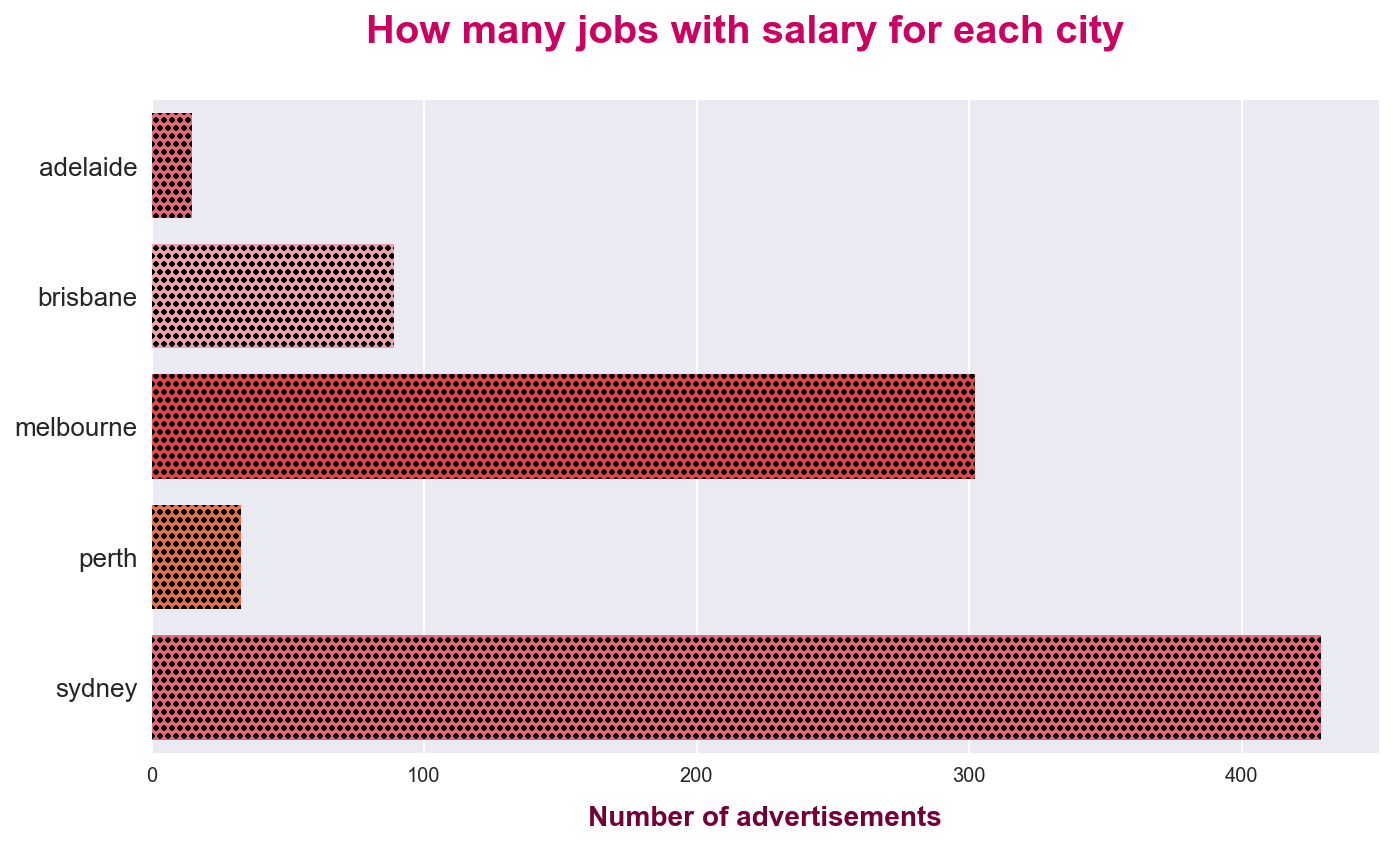

In [18]:
fig = plt.figure(1, figsize = (11, 6))
colors_city = ['#fe2f4a', '#fe828c', '#fe0002', '#fe420f']
ax = sns.barplot(x = "count", y = "location", data = new, palette = colors_city, hatch = 'ooo', 
                 alpha = 0.8, ci = None)


ax.yaxis.label.set_visible(False)
plt.suptitle('How many jobs with salary for each city', fontsize=20, color='#cb0162',  weight = 'bold')
plt.yticks(fontsize=13)
plt.xlabel('Number of advertisements',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

plt.show()

<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
On the graph with density I can see how jobs are spread between the salary for each city. Sydney has more jobs between 50000 and 150000. Also we can see Brisbane has many jobs with salary between 200000 and 250000. Also here I can see again how much more Sydney and Melbourne has jobs offers with given salary. 

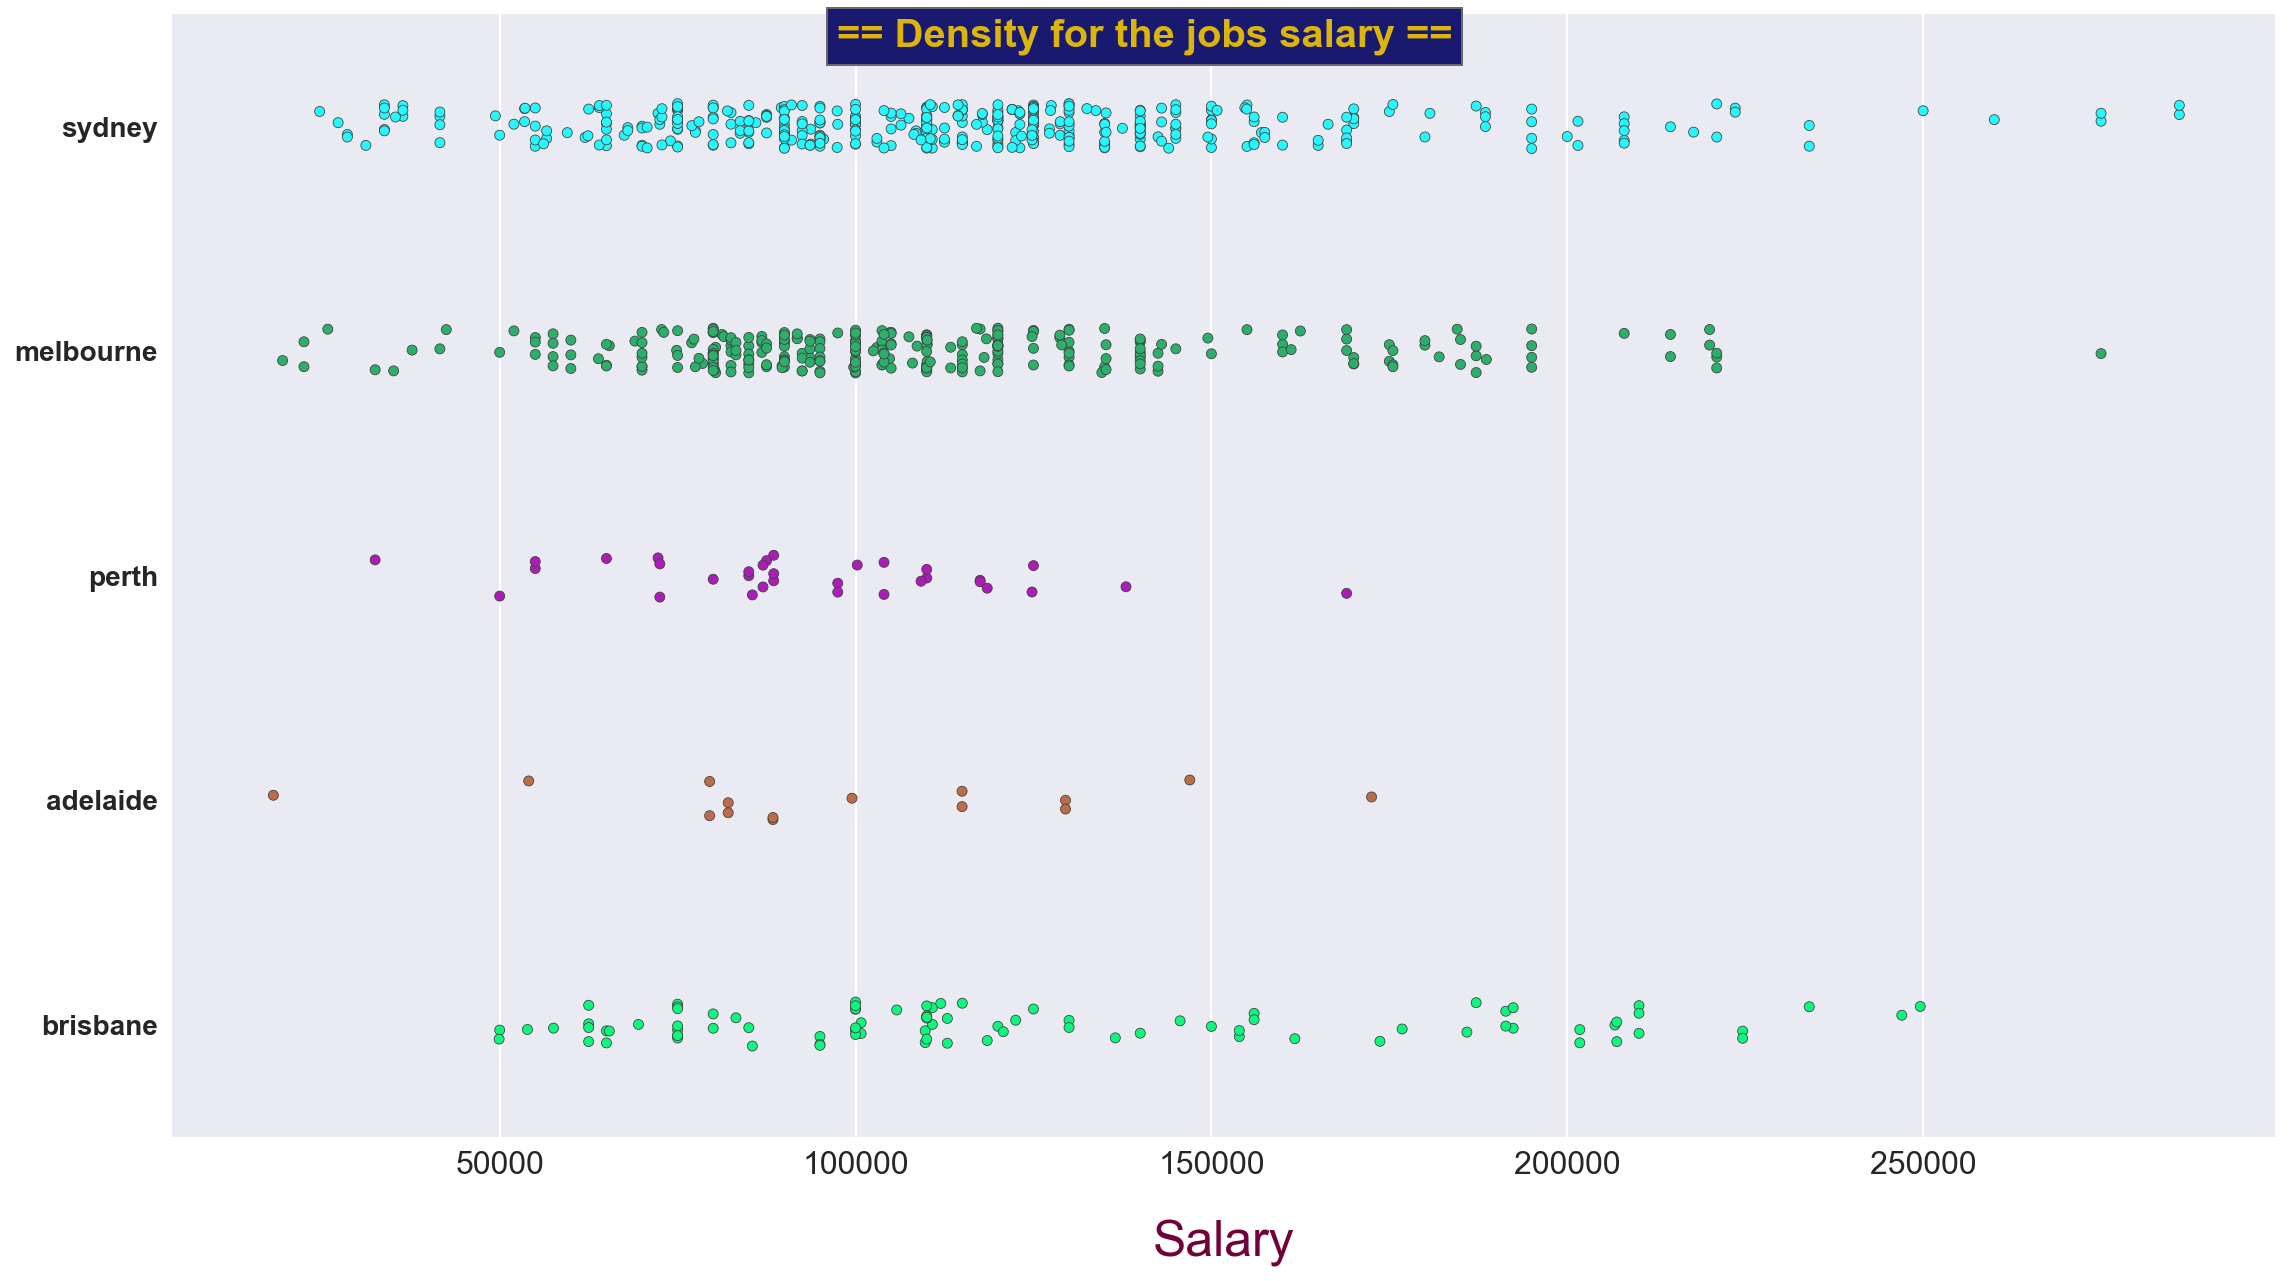

In [31]:
bars_colors = ['#26f7fd', '#2baf6a', '#ac1db8', '#bd6c48', '#0bf77d']

fig = plt.figure(1, figsize = (16,9))
df_xx = df.loc[:, ['location', 'salary']]
pl = sns.stripplot(y = 'location', x = 'salary', size = 5, palette = bars_colors, data = df_xx,
                   linewidth = 0.4, jitter = True)

plt.suptitle('== Density for the jobs salary ==', fontsize=20, color='#dbb40c',  weight = 'bold', 
             bbox = {'facecolor' : 'midnightblue', 'pad' : 5})

plt.setp(pl.get_xticklabels(), fontsize = 16)
plt.setp(pl.get_yticklabels(), fontsize = 14, weight = 'bold')
plt.xlabel('Salary', fontsize = 25,color = '#730039', labelpad = 20)
pl.yaxis.label.set_visible(False)
plt.tight_layout(w_pad = 3)

plt.show()

 <span style="color:red">
-- Comment --

<span style="color:#1d5dec">
After looking on box plot, percentile of my data and density I decided drop my outliers as I can see all data for perth and adelaide below 2000000 so Im not loosing any poing from this two - they have only few datapoints. I decided drop all data which is lower 2.5 percentile and higher 97.5 percentile. Now my data look bit more compact I will keep it.

In [20]:
# Check boarders for 97.5 and 2.5 percentile of my data. 
# -----------------------------------------------------
cont = {'Salary' : pd.Series([np.percentile(df.salary, 97.5, axis=0), np.percentile(df.salary, 2.5, axis=0)],
                          index=['97.5%', '2.5%'])}
cont = pd.DataFrame(cont)
cont

,Salary
97.5%,220000.0
2.5%,37277.5


In [21]:
# Remove outliers from my data.
# -----------------------------------------------------
df_no_outliers = df.loc[df['salary'] <= 220000]
df_no_outliers = df_no_outliers.loc[df_no_outliers['salary'] >= 37277]

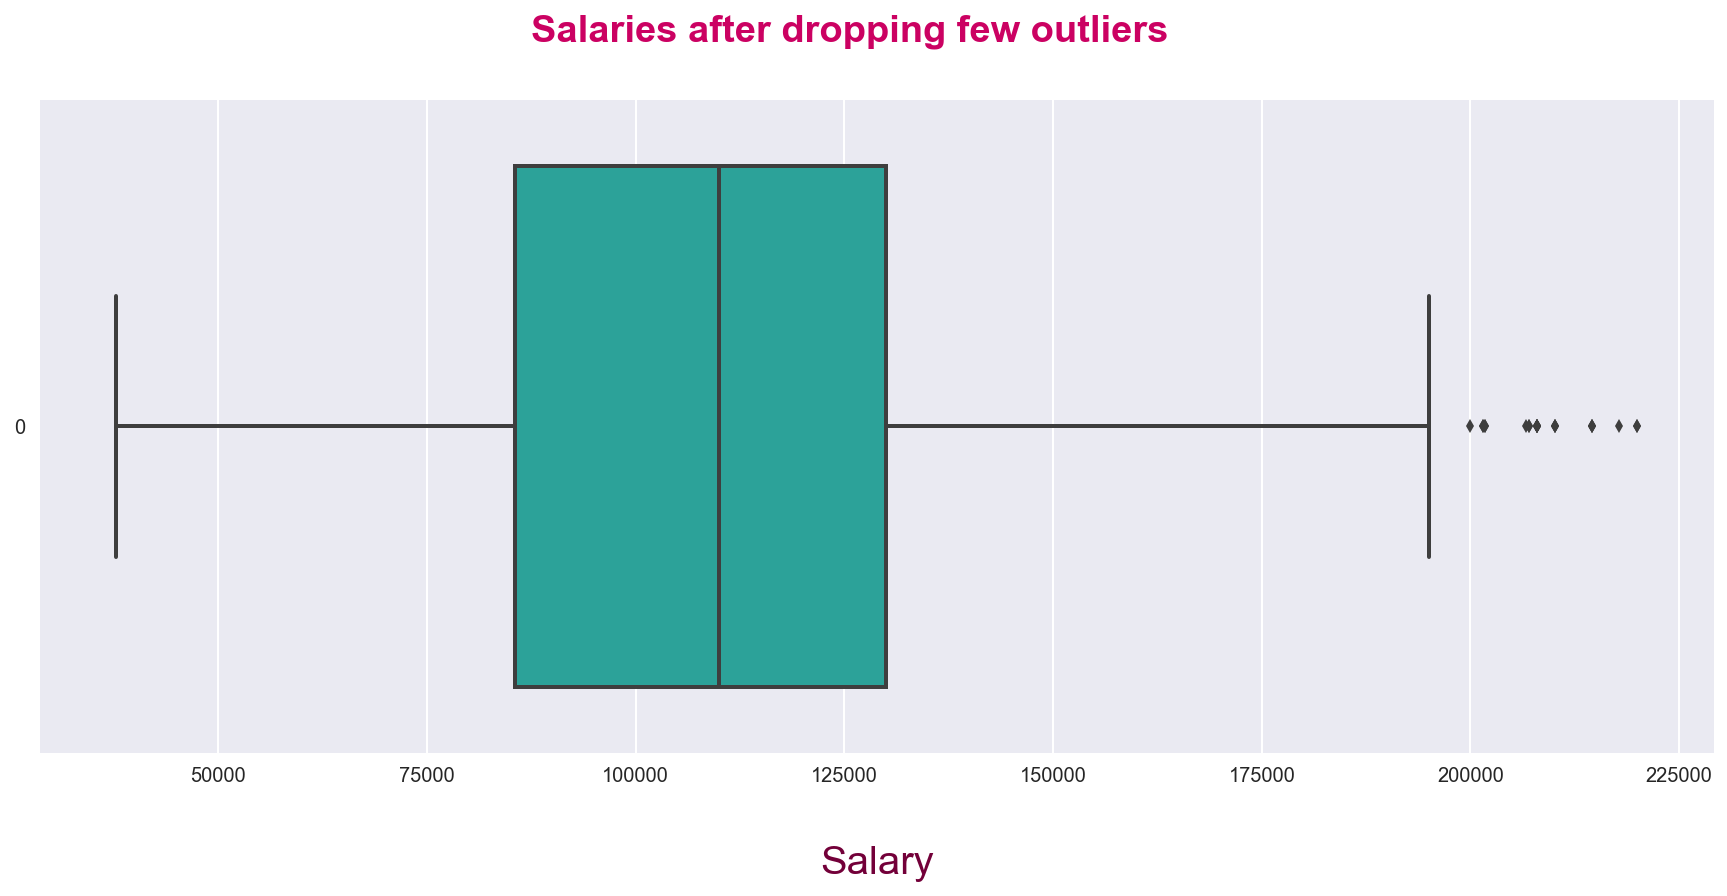

In [22]:
# Check how my data looks like now after dropping few outliers. 
# -----------------------------------------------------
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(15,6))
ax = sns.boxplot(data=df_no_outliers.salary, orient='h', fliersize=5, 
                 linewidth=2, notch=False, saturation=0.7, color='#13bbaf')
plt.suptitle('Salaries after dropping few outliers', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Salary', fontsize=20, labelpad=30, color='#730039')
plt.show()

 <span style="color:red">
-- Comment --

<span style="color:#1d5dec">
As I can see my median still the same $110000. My mean now is bit more closer to median, I got less skewness now. 

In [23]:
print('Median with outliers: ',df.salary.median())
print('Median withOut outliers: ',df_no_outliers.salary.median())
print('')
print('Mean with ouliers: ',df.salary.mean())
print('Mean withOut ouliers: ',df_no_outliers.salary.mean())

Median with outliers:  110000.0
Median withOut outliers:  110000.0

Mean with ouliers:  113008.34873271888
Mean withOut ouliers:  111904.91842424241


<span style="color:red">
-- Comment --

<span style="color:#1d5dec">
For the next graph I need to make new column in my DataFrame with information salary_groups, where (0 = 0 - 60000k, 1 = 60000-140000k, 2 = 140000k+) I will plot it to show how salary amount spread between cities. I can see that salary 60000 to 140000 most common between all cities. Also Brisbane has only few jobs below 60000k which is why averedge salary in Brisbane on 1st place between all cities. 

In [24]:
# Assign my data into new variable
# -----------------------------------------------------
df_xx2 = df_no_outliers.iloc[::,0:8]

In [25]:
# Drop unneded columns for my next graph
# -----------------------------------------------------
df_xx2.drop(['title', 'company', 'Salary_type', 'summary', 'job_bio'], axis=1, inplace=True)

In [26]:
# Set 3 groups with different ranges of salary
# -----------------------------------------------------
group = lambda x : ((0, 1)[x > 60000], 2)[x > 140000]
df_xx2['salary_groups'] = df_xx2['salary'].apply(group)

In [27]:
# Check if I got what I want. It is what I need
# -----------------------------------------------------
df_xx2.head(7)

,location,salary,level,salary_groups
0,sydney,106382.0,middle,1
1,sydney,137500.0,senior,1
2,sydney,93704.5,middle,1
3,sydney,75000.0,junior,1
4,sydney,108792.0,middle,1
5,sydney,145000.0,middle,2
6,sydney,110000.0,middle,1


In [28]:
# Check for uniq values in salary_groups column
# -----------------------------------------------------
df_xx2.salary_groups.unique()

array([1, 2, 0])

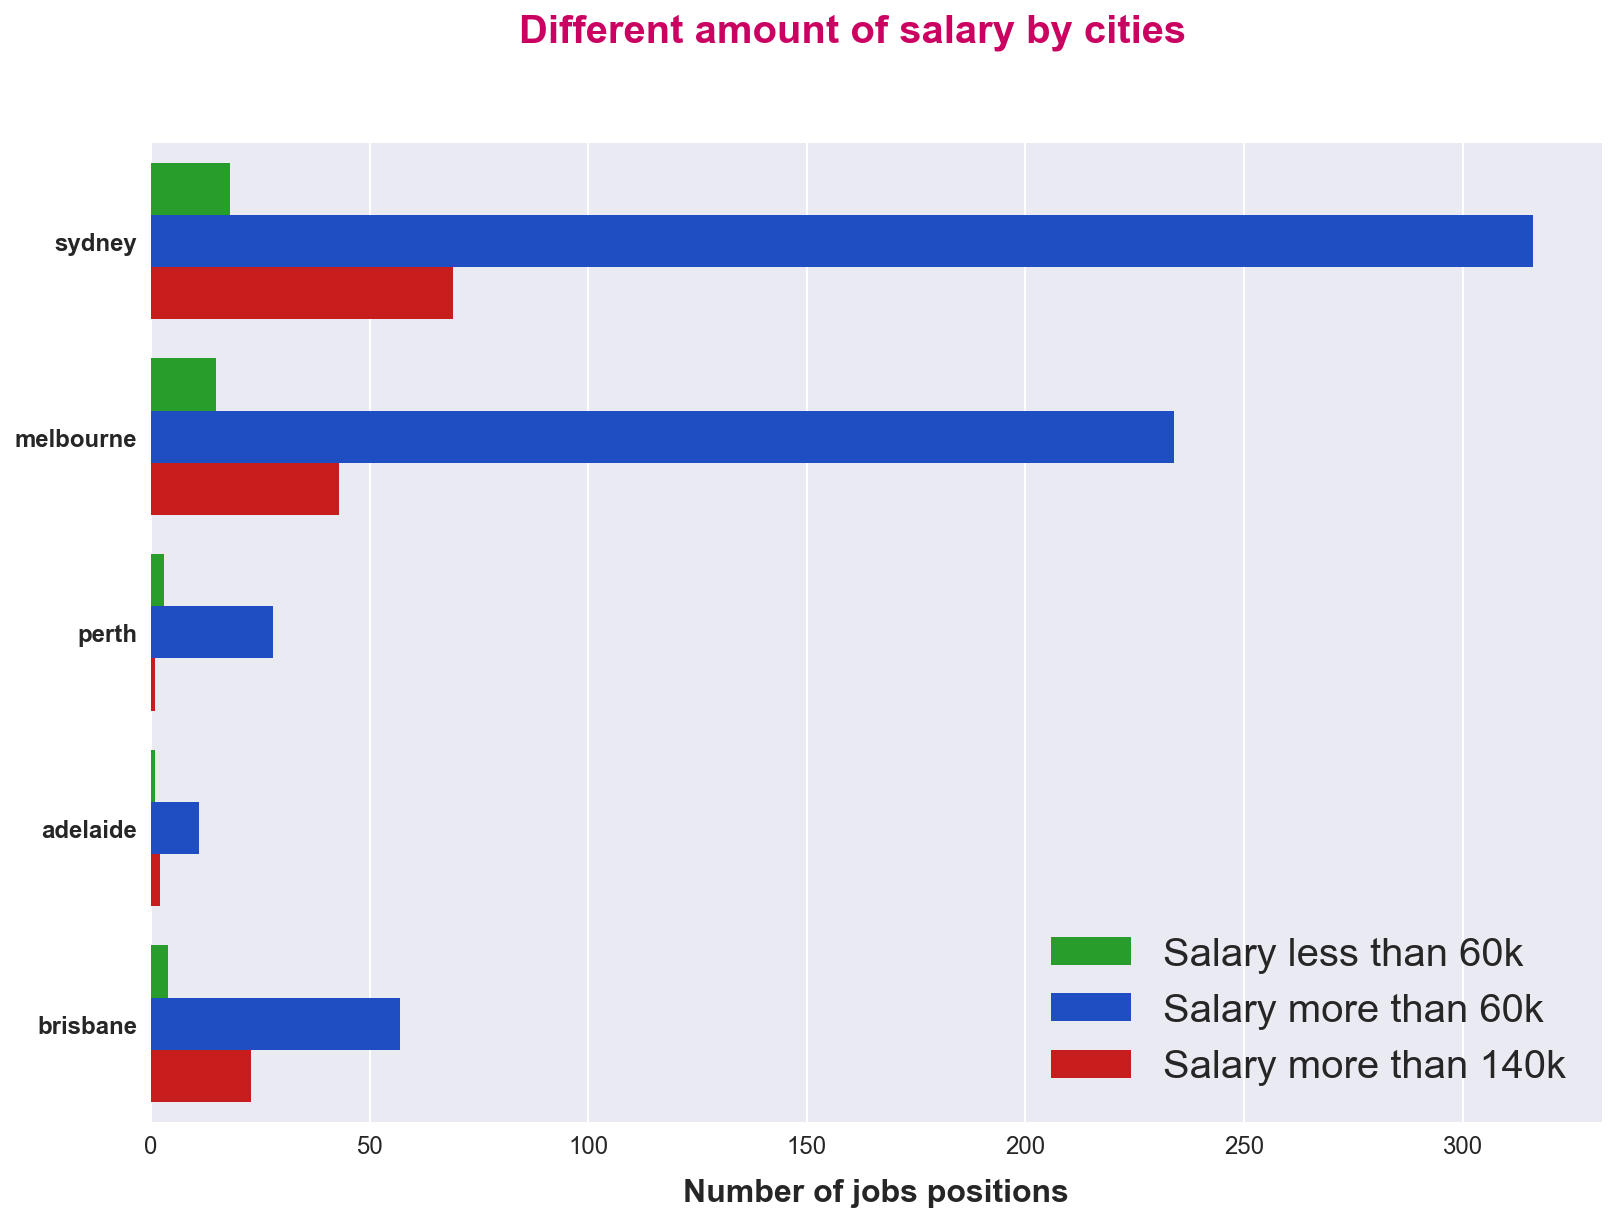

In [29]:
bars_colors2 = ['green', 'blue', 'red']
               
fig = plt.figure(1, figsize = (13, 9))
ax = sns.countplot(y = 'location', hue = 'salary_groups', data = df_xx2, palette=sns.xkcd_palette(bars_colors2))

labels = [[df_xx2.location.values] for i in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize = 12, weight = 'normal', rotation = 0)
plt.setp(ax.get_yticklabels(), fontsize = 12, weight = 'bold', rotation = 0)
plt.suptitle('Different amount of salary by cities', fontsize=20, color='#cb0162',  weight = 'bold')
ax.yaxis.label.set_visible(False)
plt.xlabel('Number of jobs positions', fontsize = 16, weight = 'bold', labelpad = 10)

L = plt.legend(fontsize = 20)
L.get_texts()[0].set_text('Salary less than 60k')
L.get_texts()[1].set_text('Salary more than 60k')
L.get_texts()[2].set_text('Salary more than 140k')

plt.show()

In [30]:
# Save my new data without outliers for modeling. 
# -----------------------------------------------------
df_no_outliers.to_csv('4_salary_no_outliers.csv')